# Step 26

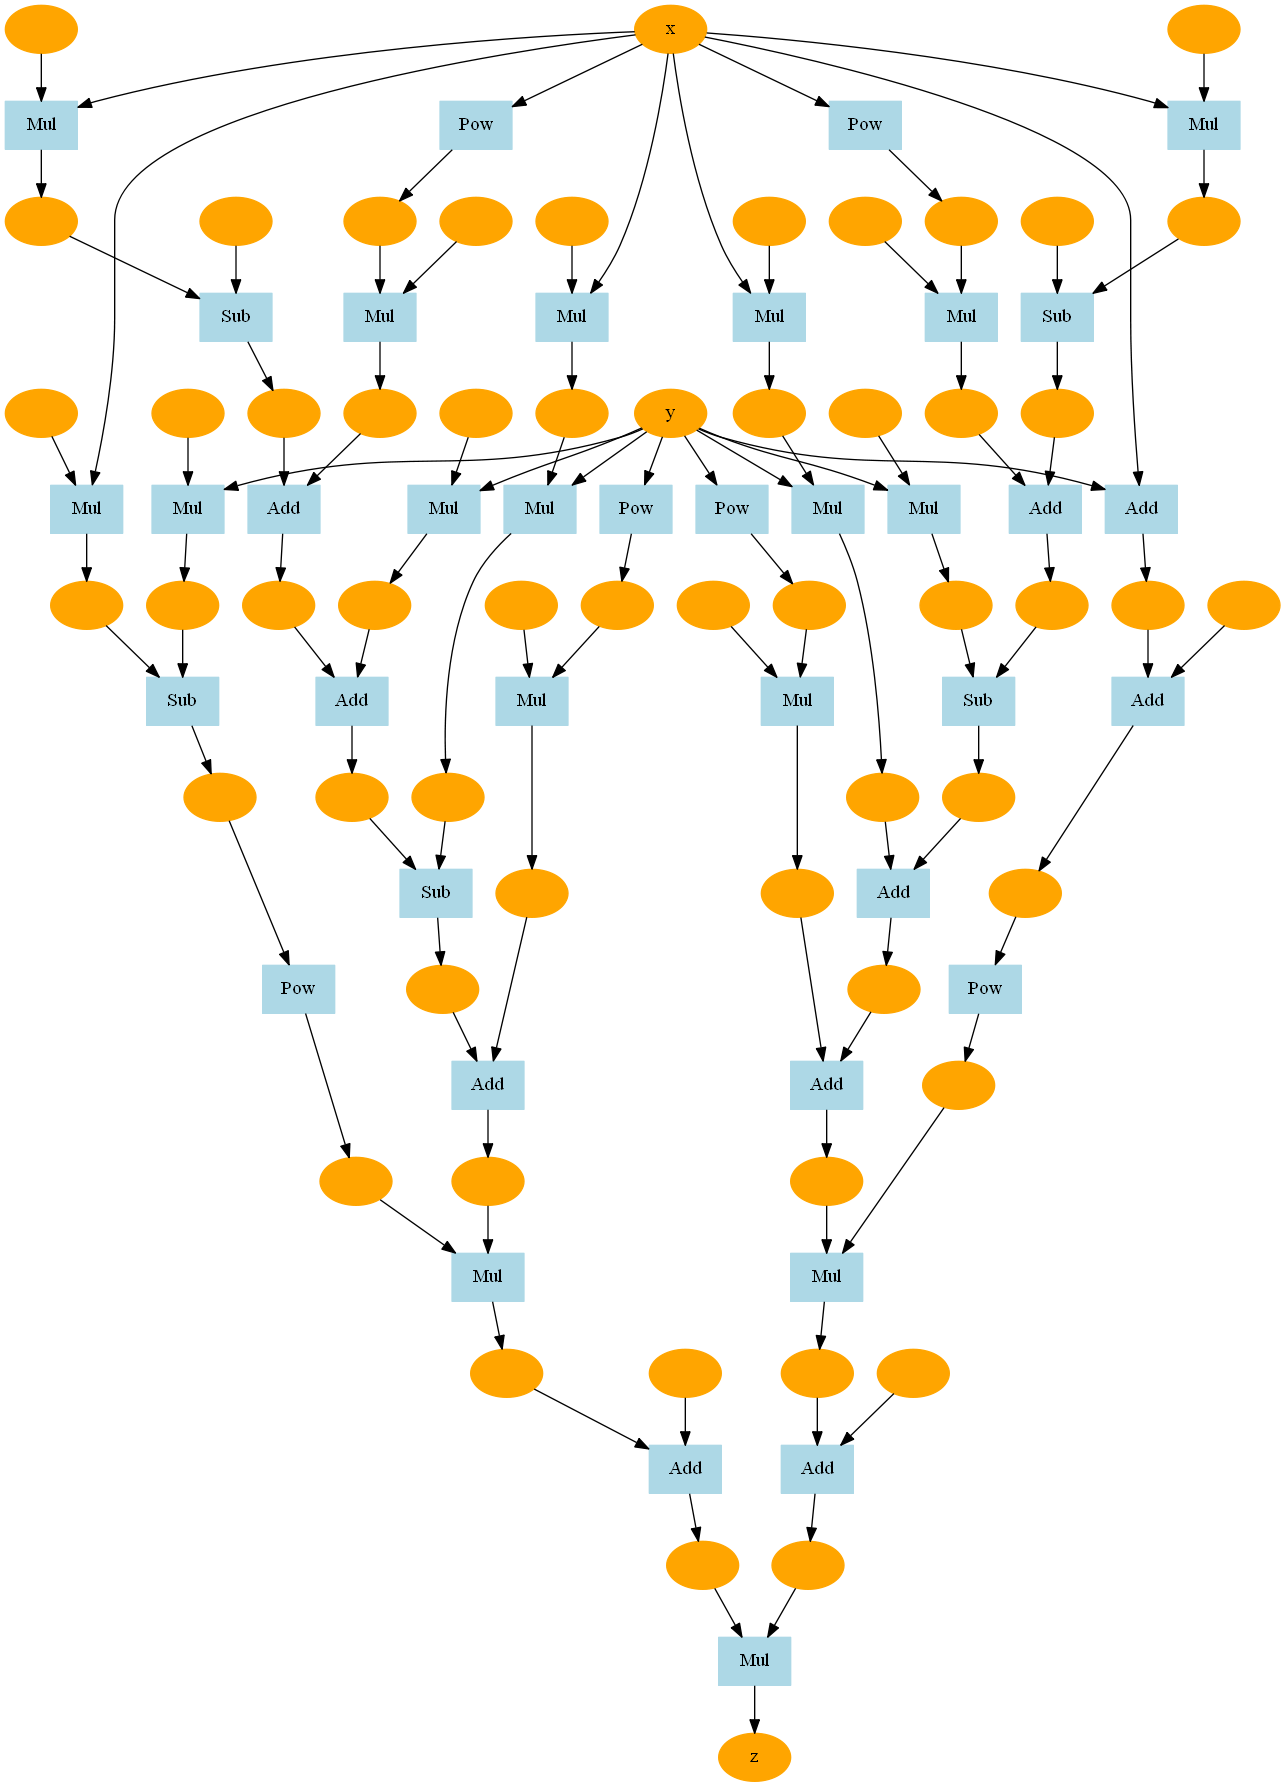

In [1]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x,y):
    z=(1+(x+y+1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
      (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x=Variable(np.array(1.0), name='x')
y=Variable(np.array(1.0), name='y')
z=goldstein(x,y)
z.backward()
z.name='z'

plot_dot_graph(z, verbose=False, to_file='goldstein1.png')


# step 27

In [5]:
from dezero import Variable
from dezero import Function
from dezero.core_simple import*
import numpy as np
x=Variable(np.array(np.pi/4))
y=sin(x)
y.backward()
print(y.data)
print(x.grad)

0.7071067811865476
0.7071067811865476


In [10]:
import math

def my_sin(x, threshold=1e-30):
    y=0
    for i in range(100000):
        c=(-1)**i / math.factorial(2*i+1)
        t=c*x**(2*i+1)
        y=y+t
        if abs(t.data) < threshold:
            break
    return y

In [11]:
x=Variable(np.array(np.pi/4))
y=my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071067811865475
0.7071067811865475


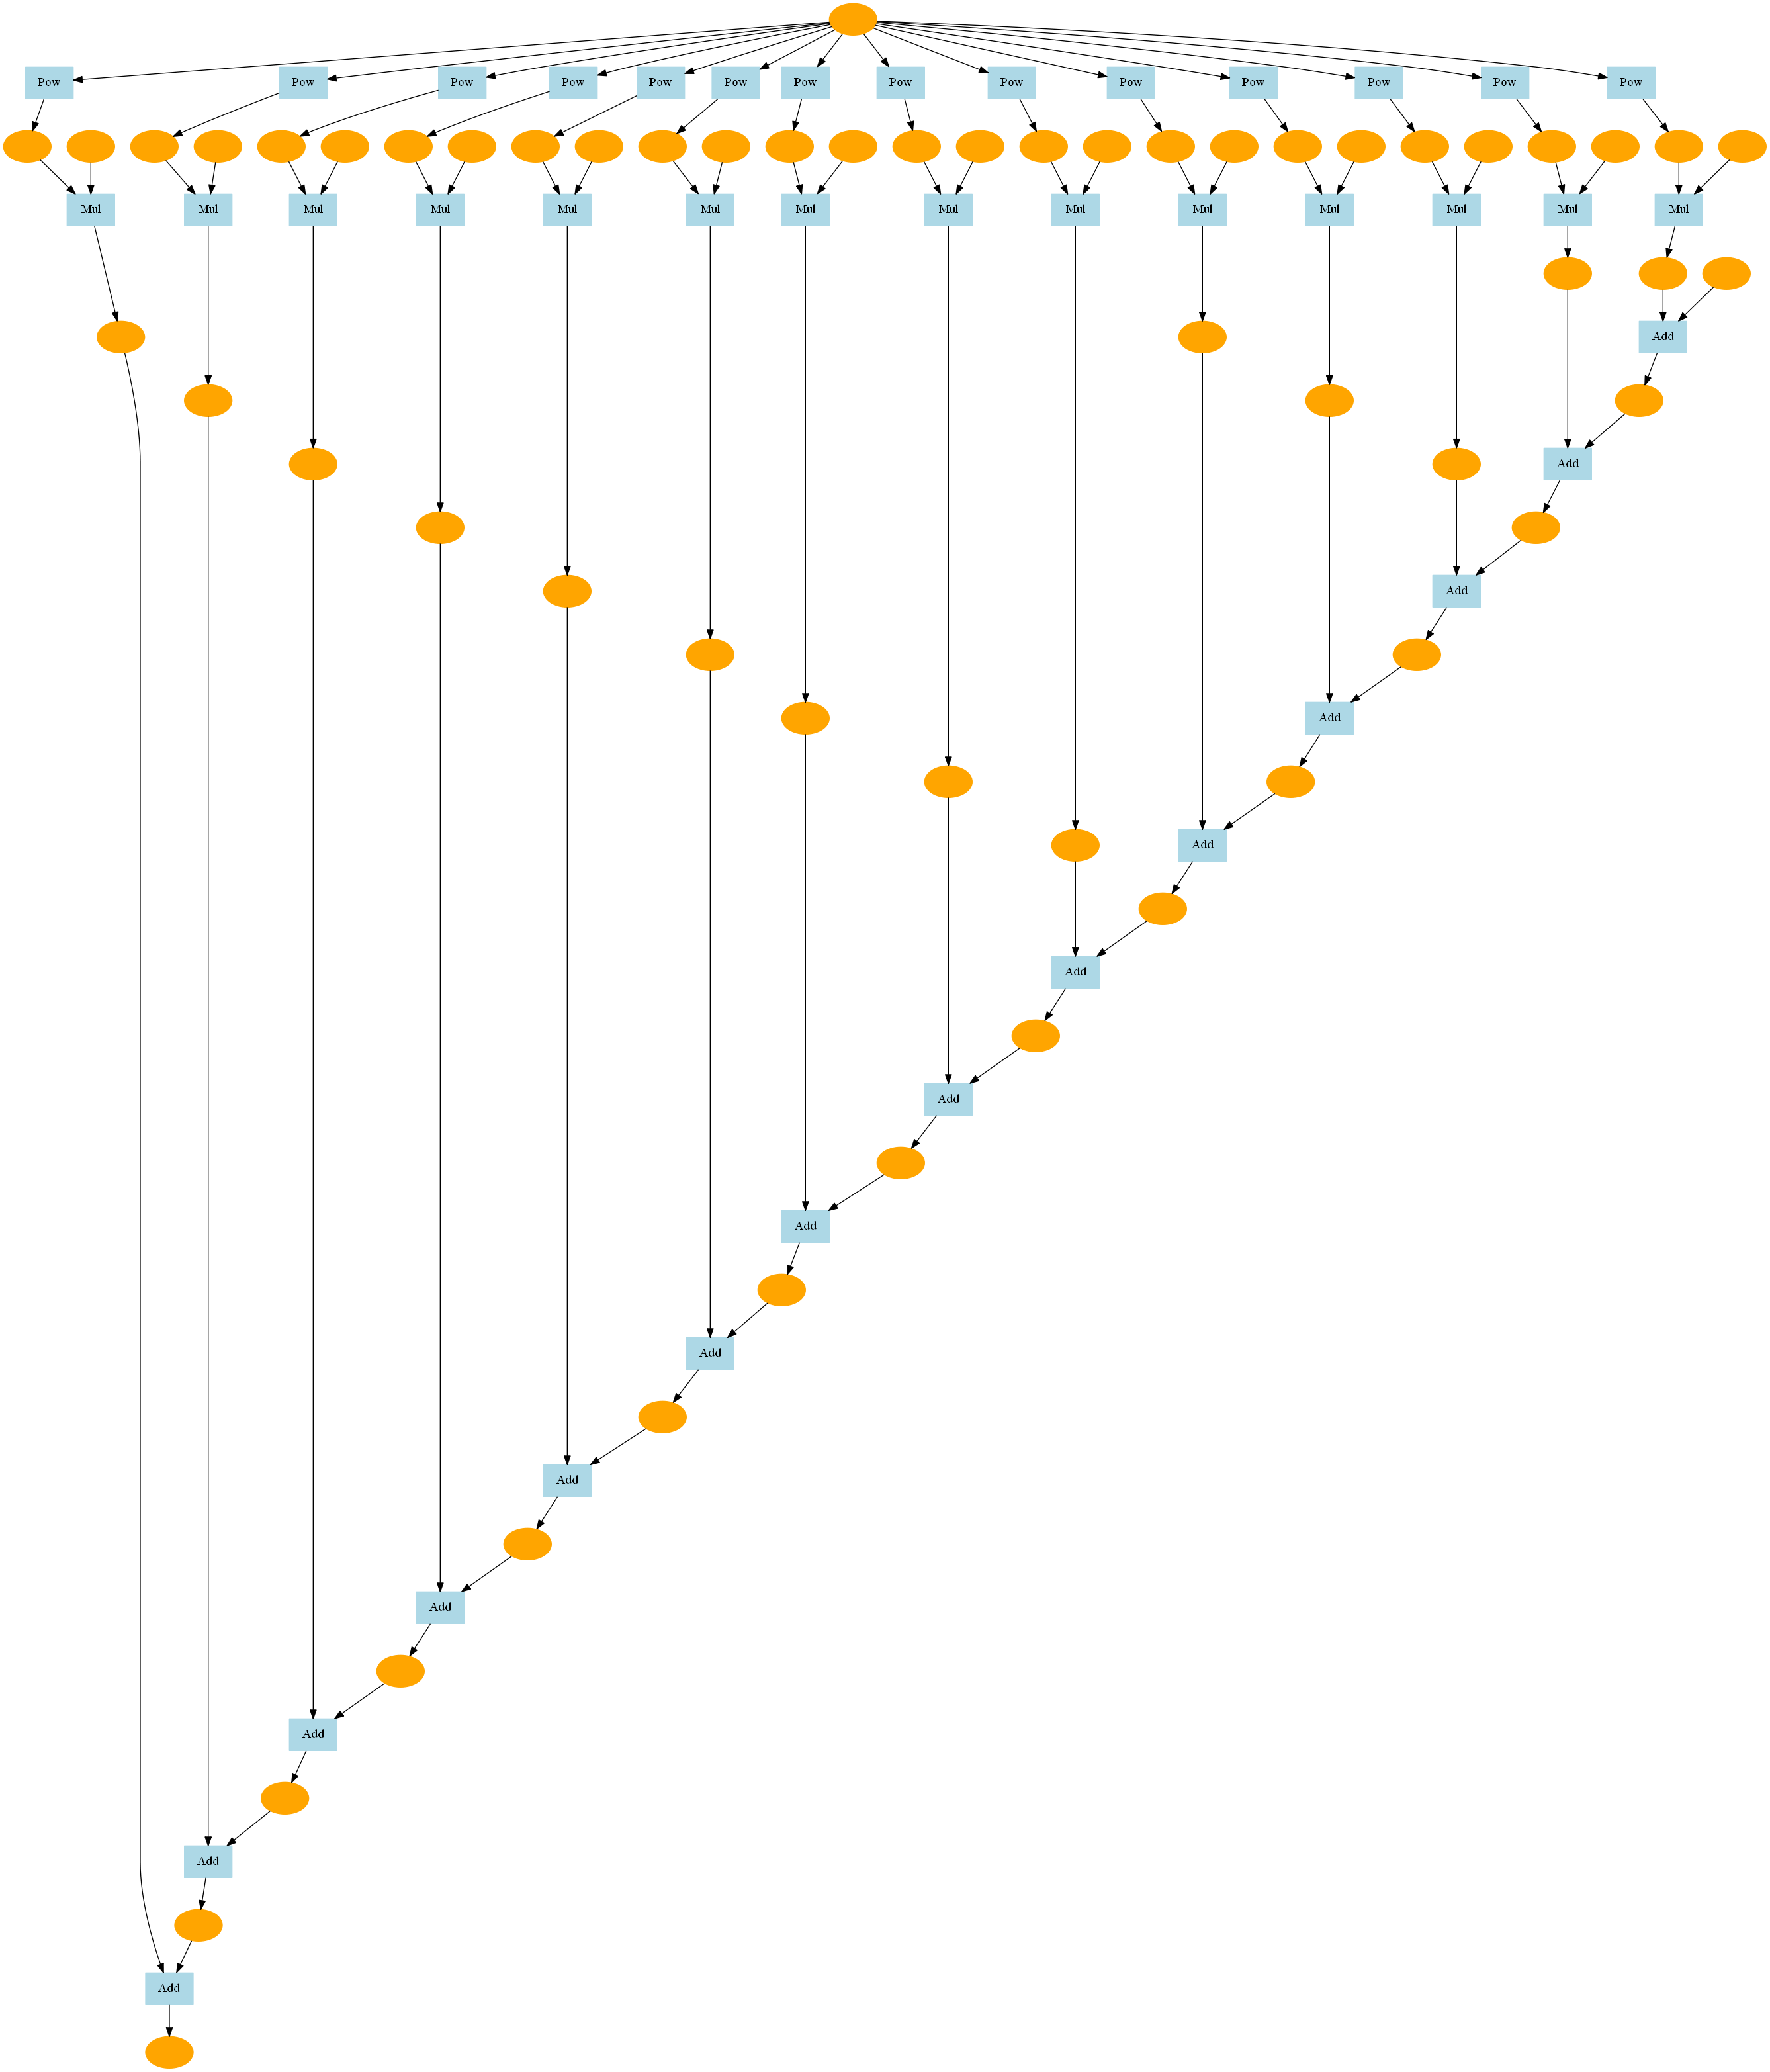

In [12]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
plot_dot_graph(y, verbose=False, to_file='sin.png')

# Step 28

In [13]:
import numpy as np
from dezero import Variable

def rosenbrock(x0,x1):
    y=100*(x1-x0**2)**2+(x0-1)**2
    return y

In [14]:
x0=Variable(np.array(0.0))
x1=Variable(np.array(2.0))
lr=0.001
iters=1000

for i in range(iters):
    print(x0,x1)
    
    y=rosenbrock(x0,x1)
    
    x0.cleargrad()
    x1.cleargrad()
    y.backward()
    
    x0.data-=lr*x0.grad
    x1.data-=lr*x1.grad

variable(0.0) variable(2.0)
variable(0.002) variable(1.6)
variable(0.0052759968) variable(1.2800008)
variable(0.009966698110960038) variable(1.0240062072284468)
variable(0.01602875299014943) variable(0.8192248327970044)
variable(0.02324750923068761) variable(0.6554312504220874)
variable(0.031290846214210376) variable(0.5244530896747561)
variable(0.039780241951514035) variable(0.41975829515116514)
variable(0.04835473570612382) variable(0.3361231296508763)
variable(0.05671405943493354) variable(0.26936613981374286)
variable(0.06463840226323121) variable(0.2161362087585121)
variable(0.07198937826156711) variable(0.17374459161623834)
variable(0.07869927242171229) variable(0.14003216740948807)
variable(0.08475507379959696) variable(0.11326444902353183)
variable(0.0901819257435144) variable(0.0920482437257805)
variable(0.09502862514911821) variable(0.07526515092678615)
variable(0.09935624532071949) variable(0.062018208660975245)
variable(0.10322996680416148) variable(0.05158889962562639)
var

variable(0.49453834747486897) variable(0.24203395380960233)
variable(0.49504796253606875) variable(0.24254079847231672)
variable(0.49555654406626837) variable(0.24304713582007595)
variable(0.49606409573992694) variable(0.24355296632944143)
variable(0.49657062121283496) variable(0.24405829048000743)
variable(0.4970761241222334) variable(0.24456310875434611)
variable(0.4975806080869322) variable(0.24506742163795328)
variable(0.4980840767074279) variable(0.24557122961919486)
variable(0.49858653356602006) variable(0.24607453318925407)
variable(0.4990879822269274) variable(0.24657733284207928)
variable(0.4995884262364026) variable(0.2470796290743326)
variable(0.5000878691228463) variable(0.24758142238533917)
variable(0.5005863143969207) variable(0.24808271327703715)
variable(0.5010837655516618) variable(0.24858350225392828)
variable(0.5015802260625909) variable(0.24908378982302917)
variable(0.5020756993878257) variable(0.2495835764938233)
variable(0.5025701889681902) variable(0.250082862778

variable(0.6035111837926737) variable(0.36227404860275325)
variable(0.6038330122271999) variable(0.36266438867476947)
variable(0.6041543762636158) variable(0.3630543722708903)
variable(0.6044752770506157) variable(0.363443999888408)
variable(0.6047957157327238) variable(0.3638332720238101)
variable(0.6051156934503149) variable(0.3642221891727796)
variable(0.605435211339633) variable(0.36461075183019476)
variable(0.6057542705328114) variable(0.36499896049012903)
variable(0.6060728721578924) variable(0.3653868156458509)
variable(0.6063910173388463) variable(0.3657743177898241)
variable(0.6067087071955906) variable(0.3661614674137075)
variable(0.6070259428440096) variable(0.36654826500835497)
variable(0.6073427253959727) variable(0.36693471106381575)
variable(0.6076590559593541) variable(0.3673208060693342)
variable(0.6079749356380509) variable(0.36770655051335005)
variable(0.6082903655320023) variable(0.3680919448834985)
variable(0.6086053467372079) variable(0.3684769896666102)
variable(

In [15]:
def f(x):
    y=x**4 - 2*x**2
    return y

def gx2(x):
    return 12*x**2 - 4

x=Variable(np.array(2.0))
iters=10

for i in range(iters):
    print(i,x)
    y=f(x)
    x.cleargrad()
    y.backward()
    x.data-=x.grad/gx2(x.data)

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)
